In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/helmet_detection/training'
valid_path = '/content/drive/My Drive/helmet_detection/validation'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False
  

In [ ]:
folders = glob('/content/drive/My Drive/helmet_detection/training/*')

In [ ]:
x = Flatten()(vgg.output)

prediction = Dense(len(folders), activation='softmax')(x)


In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/helmet_detection/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 200 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/helmet_detection/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 32 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
7/7 [==============================] - 69s 10s/step - loss: 11.7022 - accuracy: 0.4752 - val_loss: 4.7326 - val_accuracy: 0.5000
Epoch 2/15
7/7 [==============================] - 68s 11s/step - loss: 1.8606 - accuracy: 0.6376 - val_loss: 1.0048 - val_accuracy: 0.5625
Epoch 3/15
7/7 [==============================] - 68s 10s/step - loss: 1.1334 - accuracy: 0.5884 - val_loss: 0.3936 - val_accuracy: 0.8125
Epoch 4/15
7/7 [==============================] - 68s 10s/step - loss: 0.4747 - accuracy: 0.7794 - val_loss: 0.2384 - val_accuracy: 0.8750
Epoch 5/15
7/7 [==============================] - 68s 10s/step - loss: 0.3500 - accuracy: 0.8725 - val_loss: 0.2228 - val_accuracy: 0.9375
Epoch 6/15
7/7 [==============================] - 68s 11s/step - loss: 0.2426 - accuracy: 0.8795 - val_loss: 0.1379 - val_accuracy: 1.0000
Epoch 7/15
7/7 [==============================] - 68s 11s/step - loss: 0.2019 - accuracy: 0.9124 - val_loss: 0.1317 - val_accuracy: 0.9375
Epoch 8/15
7/7 [==========

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/helmet_detection/model5.hdf5')

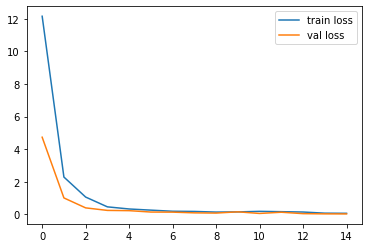

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

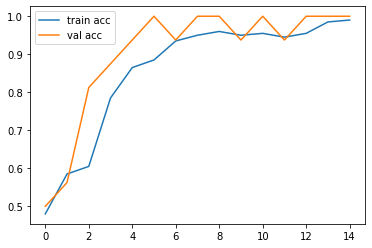

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from keras.preprocessing import image as image_utils

In [ ]:
test_image = image_utils.load_img('/content/drive/My Drive/helmet_detection/ss.jpg', target_size=(224, 224))
test_image = image_utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

In [ ]:
result1 = model.predict_on_batch(test_image)
result1

array([[9.9999988e-01, 1.0159958e-07]], dtype=float32)

In [ ]:
print(result1.argmax())
for category, value in test_set.class_indices.items():
            if value == result1.argmax():
                print(category)

0
pillion_not_wearing_helmet
